### Importaciones

In [ ]:
pip install imblearn w

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, multilabel_confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Train test

In [3]:
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


### Logistic Regresion multiclase

In [ ]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy (Logistic):", accuracy_score(y_test, pred))

### Logistic Regression Multiclase con GridSearchCV

In [13]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500))])

param_grid = {"logreg__C": [0.1, 1, 3, 5, 10]}

grid = GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy",n_jobs=-1)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

print("Mejor C:", grid.best_params_)

y_pred_log = best_model.predict(X_test)
print("Accuracy (Logistic GS):", accuracy_score(y_test, y_pred_log))


with open("logistic_gs.pkl", "wb") as f:
    pickle.dump(best_model, f)


Mejor C: {'logreg__C': 1}
Accuracy (Logistic GS): 0.5625


### RandomForest con GridSearchCV

In [14]:
rf = RandomForestClassifier(random_state=11)

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [3, 10, 20, 30]}

grid = GridSearchCV(rf,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_rf = best_rf.predict(X_test)
print("Accuracy (RF GS):", accuracy_score(y_test, y_pred_rf))


with open("random_forest_gs.pkl", "wb") as f:
    pickle.dump(best_rf, f)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros: {'max_depth': 30, 'n_estimators': 200}
Accuracy (RF GS): 0.696875


### Adaboost con GridSearchCV

In [21]:
ada = AdaBoostClassifier(random_state=11)

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0]}

grid = GridSearchCV(ada,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_ada = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)


y_pred_ada = best_ada.predict(X_test)
print("Accuracy AdaBoost (GS):", accuracy_score(y_test, y_pred_ada))


with open("adaboost_gs.pkl", "wb") as f:
    pickle.dump(best_ada, f)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy AdaBoost (GS): 0.55


### Gradientboost con GridSearchCV

In [4]:
gb = GradientBoostingClassifier(random_state=11)

param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5, 6]}

grid = GridSearchCV(gb,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_gb = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_gb = best_gb.predict(X_test)
print("Accuracy GradientBoost (GS):", accuracy_score(y_test, y_pred_gb))


with open("gradient_boosting_gs.pkl", "wb") as f:
    pickle.dump(best_gb, f)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Accuracy GradientBoost (GS): 0.646875


### XGBoost con GrindSearchCV

In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=11,stratify=y_encoded)


xgb_model = xgb.XGBClassifier(objective="multi:softprob",num_class=len(np.unique(y_encoded)),eval_metric="mlogloss",random_state=11,n_jobs=-1)


param_grid = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 6, 8]}

grid = GridSearchCV(xgb_model,param_grid,cv=5,scoring="accuracy",n_jobs=-1,verbose=1)


grid.fit(X_train, y_train)
best_xgb = grid.best_estimator_
print("Mejores parámetros:", grid.best_params_)

y_pred_xgb = best_xgb.predict(X_test)
print("Accuracy XGBoost (GS):", accuracy_score(y_test, y_pred_xgb))


with open("mxgboost_gs.pkl", "wb") as f:
    pickle.dump({"model": best_xgb,"label_encoder": le},f)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}
Accuracy XGBoost (GS): 0.665625


### XGBoost (mi mejor modelo) con SMOTE y Feature Importance

Accuracy XGBoost sin SMOTE: 0.665625

Feature importance (sin SMOTE):
                 Feature  Importance
10               alcohol    1.586631
9              sulphates    0.716811
1       volatile acidity    0.709331
6   total sulfur dioxide    0.665379
0          fixed acidity    0.612367
5    free sulfur dioxide    0.601406
8                     pH    0.567940
2            citric acid    0.530717
4              chlorides    0.529786
3         residual sugar    0.528145
7                density    0.443362

Accuracy XGBoost con SMOTE: 0.659375

Feature importance (con SMOTE):
                 Feature  Importance
1       volatile acidity    5.571173
10               alcohol    4.432128
9              sulphates    2.726721
4              chlorides    2.617928
6   total sulfur dioxide    2.265218
7                density    1.508984
5    free sulfur dioxide    1.418239
0          fixed acidity    1.371856
8                     pH    1.348836
3         residual sugar    1.283387
2       

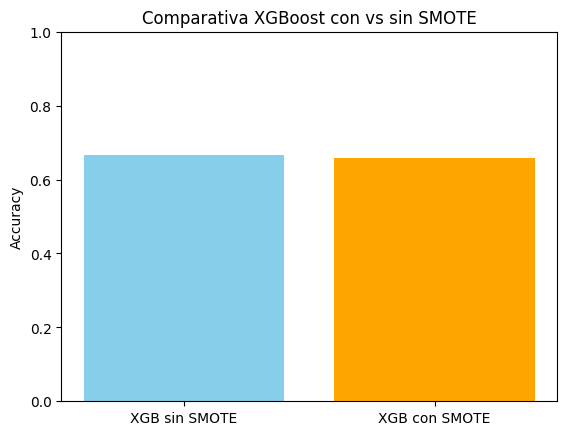

In [14]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_mapping = dict(zip(le.classes_, range(len(le.classes_))))
inv_class_mapping = {v: k for k, v in class_mapping.items()}


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11, stratify=y_encoded)


sampling_strategy = {
    class_mapping[3]: 800,
    class_mapping[4]: 800,
    class_mapping[7]: 800,
    class_mapping[8]: 800,
    class_mapping[5]: 1000,
    class_mapping[6]: 1000}


xgb_model_no_smote = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    eval_metric="mlogloss",
    learning_rate=0.05,
    max_depth=8,
    n_estimators=300,
    random_state=11,
    n_jobs=-1)

xgb_model_no_smote.fit(X_train, y_train)
y_pred_no_smote = xgb_model_no_smote.predict(X_test)
acc_no_smote = accuracy_score(y_test, y_pred_no_smote)
print("Accuracy XGBoost sin SMOTE:", acc_no_smote)


importances_no_smote = xgb_model_no_smote.get_booster().get_score(importance_type="gain")
feat_imp_no_smote = (
    pd.DataFrame(importances_no_smote.items(), columns=["Feature", "Importance"])
      .sort_values("Importance", ascending=False)
)
print("\nFeature importance (sin SMOTE):")
print(feat_imp_no_smote)


pipe_smote = Pipeline(steps=[
    ("smote", SMOTE(
        sampling_strategy=sampling_strategy,
        random_state=11,
        k_neighbors=5)),
    ("xgb", xgb.XGBClassifier(
        objective="multi:softprob",
        num_class=len(le.classes_),
        eval_metric="mlogloss",
        learning_rate=0.05,
        max_depth=8,
        n_estimators=300,
        random_state=11,
        n_jobs=-1))])

pipe_smote.fit(X_train, y_train)
y_pred_smote = pipe_smote.predict(X_test)
acc_smote = accuracy_score(y_test, y_pred_smote)
print("\nAccuracy XGBoost con SMOTE:", acc_smote)


booster_smote = pipe_smote.named_steps["xgb"].get_booster()
importances_smote = booster_smote.get_score(importance_type="gain")
feat_imp_smote = (
    pd.DataFrame(importances_smote.items(), columns=["Feature", "Importance"])
      .sort_values("Importance", ascending=False)
)
print("\nFeature importance (con SMOTE):")
print(feat_imp_smote)


with open("xgboost_smote_final.pkl", "wb") as f:
    pickle.dump({
        "model": pipe_smote,
        "label_encoder": le,
        "class_mapping": class_mapping}, f)

print("\nModelo con SMOTE guardado como xgboost_smote_final.pkl")


models = ["XGB sin SMOTE", "XGB con SMOTE"]
accuracies = [acc_no_smote, acc_smote]

plt.figure()
plt.bar(models, accuracies, color=["skyblue", "orange"])
plt.ylabel("Accuracy")
plt.title("Comparativa XGBoost con vs sin SMOTE")
plt.ylim(0,1)
plt.show()


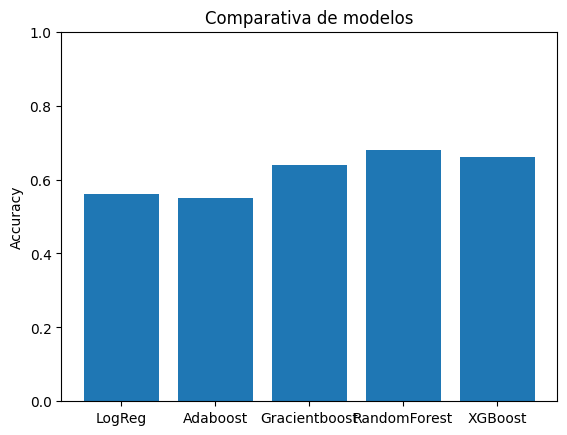

In [9]:

acc_logreg = 0.56
acc_ada = 0.55
acc_gb = 0.64
acc_rf = 0.68
acc_xgb = 0.66

models = ["LogReg","Adaboost","Gracientboost","RandomForest","XGBoost"]

accuracies = [acc_logreg,acc_ada,acc_gb,acc_rf,acc_xgb]

plt.figure()
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Comparativa de modelos")
plt.show()

c:\Users\Itxaso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Itxaso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Itxaso\AppData\Lo

Accuracy LogReg: 0.584
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.60      0.64       136
           6       0.53      0.73      0.61       128
           7       0.55      0.30      0.39        40
           8       0.00      0.00      0.00         3

    accuracy                           0.58       320
   macro avg       0.29      0.27      0.27       320
weighted avg       0.57      0.58      0.56       320

Accuracy AdaBoost: 0.566
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.09      0.14        11
           5       0.61      0.66      0.64       136
           6       0.52      0.63      0.57       128
           7       0.75      0.23      0.35        40
           8       0.00      0.00     

c:\Users\Itxaso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Itxaso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Itxaso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

Accuracy GradBoost: 0.603
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.09      0.08        11
           5       0.75      0.62      0.68       136
           6       0.61      0.59      0.60       128
           7       0.48      0.75      0.58        40
           8       0.33      0.67      0.44         3

    accuracy                           0.60       320
   macro avg       0.37      0.45      0.40       320
weighted avg       0.63      0.60      0.61       320

Accuracy RandomForest: 0.644
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.18      0.17        11
           5       0.78      0.64      0.70       136
           6       0.67      0.66      0.66       128
           7       0.52      0.78      0.62        40
           8       0.25      0.

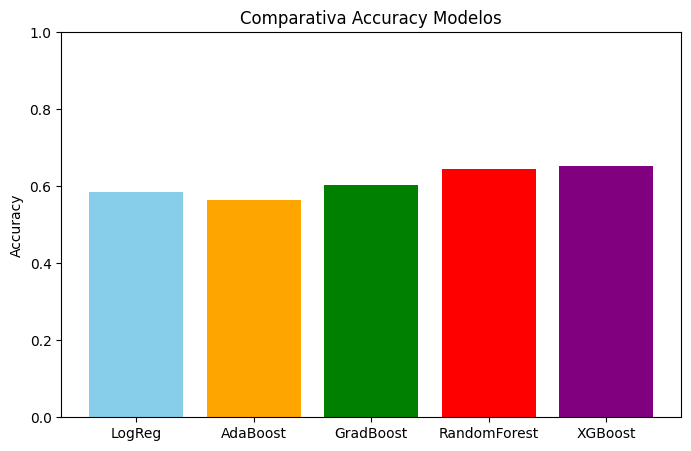

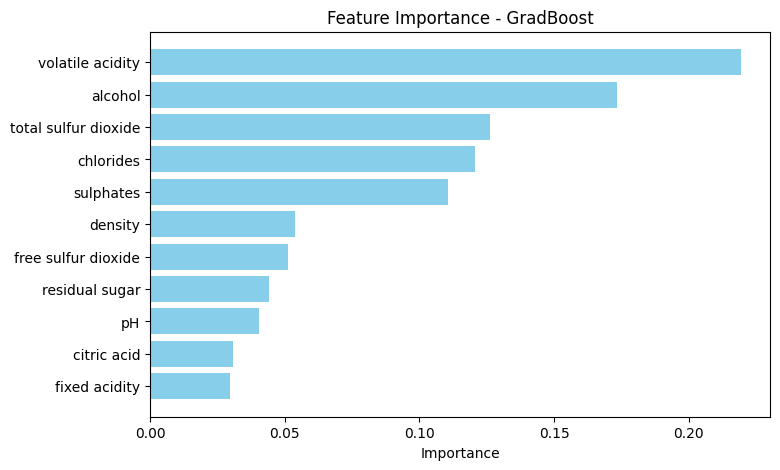

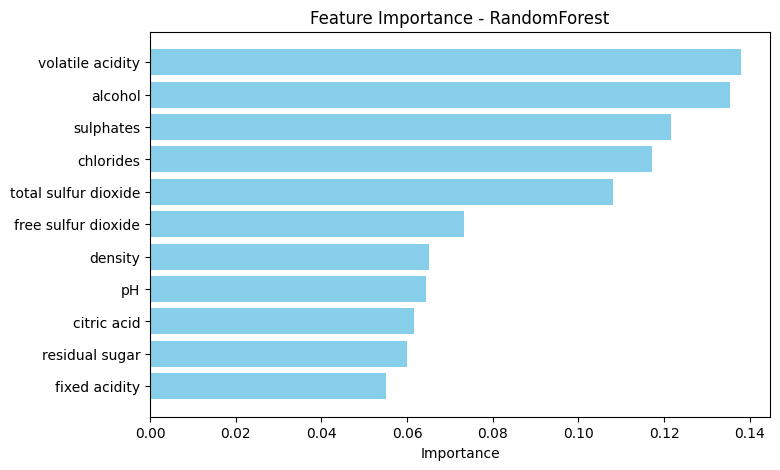

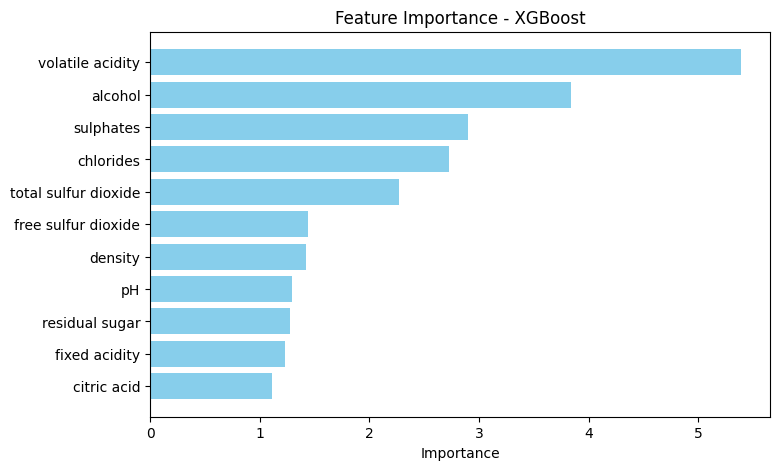


Mejor modelo según accuracy: XGBoost (0.653)
Mejor modelo guardado como best_model_XGBoost.pkl


In [12]:
X = df.drop(columns=["quality"])
y = df["quality"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_mapping = dict(zip(le.classes_, range(len(le.classes_))))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11, stratify=y_encoded)


models = {
    "LogReg": LogisticRegression(max_iter=500),
    "AdaBoost": AdaBoostClassifier(n_estimators=500,learning_rate = 0.1,random_state=11),
    "GradBoost": GradientBoostingClassifier(learning_rate = 0.05, max_depth = 5, n_estimators=100, random_state=11),
    "RandomForest": RandomForestClassifier(max_depth = 30, n_estimators=200, random_state=11, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(objective="multi:softprob",num_class=len(le.classes_),eval_metric="mlogloss",n_estimators=300,max_depth=8,learning_rate=0.05,random_state=11,n_jobs=-1)}

# Para los modelos basados en árboles podemos probar SMOTE
sampling_strategy = {cls: max(800, np.sum(y_encoded==cls)) for cls in np.unique(y_encoded)}

accuracies = {}
feature_importances = {}


for name, model in models.items():
    
    # Aplicamos SMOTE solo a los modelos de árbol
    if name in ["GradBoost", "RandomForest", "XGBoost"]:
        pipe = Pipeline([
            ("smote", SMOTE(sampling_strategy=sampling_strategy, random_state=11, k_neighbors=5)),
            ("model", model)])
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)
        
        # Feature importance si es árbol
        if name != "XGBoost":
            importances = pipe.named_steps["model"].feature_importances_
            feature_importances[name] = pd.DataFrame({
                "Feature": X.columns,
                "Importance": importances
            }).sort_values("Importance", ascending=False)
        else:
            booster = pipe.named_steps["model"].get_booster()
            importances = booster.get_score(importance_type="gain")
            feature_importances[name] = pd.DataFrame(
                importances.items(), columns=["Feature", "Importance"]
            ).sort_values("Importance", ascending=False)
        
    else:
        # Modelos que no requieren SMOTE
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)

    print(f"Accuracy {name}: {accuracies[name]:.3f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))


plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=["skyblue","orange","green","red","purple"])
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Comparativa Accuracy Modelos")
plt.show()


for name, df_imp in feature_importances.items():
    plt.figure(figsize=(8,5))
    plt.barh(df_imp["Feature"], df_imp["Importance"], color="skyblue")
    plt.xlabel("Importance")
    plt.title(f"Feature Importance - {name}")
    plt.gca().invert_yaxis()
    plt.show()


best_model_name = max(accuracies, key=accuracies.get)
print(f"\nMejor modelo según accuracy: {best_model_name} ({accuracies[best_model_name]:.3f})")

# Guardamos solo el modelo pipeline si es árbol con SMOTE, o el modelo normal si es LogReg/AdaBoost
if best_model_name in ["GradBoost", "RandomForest", "XGBoost"]:
    best_model = pipe
else:
    best_model = models[best_model_name]

with open(f"best_model_{best_model_name}.pkl", "wb") as f:
    pickle.dump({
        "model": best_model,
        "label_encoder": le,
        "class_mapping": class_mapping
    }, f)

print(f"Mejor modelo guardado como best_model_{best_model_name}.pkl")
